- *Introduction/Business Problem:* 

*New York is amongst one of the most diverse cities on the planet. New York is home to over 8.6 million people and over 800 languages. Out of the five boroughs in the city, Queens is the most diverse. Over 37% of the people in New York were born outside of the USA. New York City Is the World's Wealthiest, With US$3 Trillion in Total Wealth. New York City, home to 65 billionaires and over 380,000 millionaires, was the world's wealthiest city, according to a New World Wealth report Thursday and still boast of the top spot in terms of the richest cities in the world 2020.  New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to over 8.3 million people in 2019, accounting for over 40% of the population of New York State and a slightly lower percentage of the New York metropolitan area, home to approximately 23.6 million. Over the last decade the city has been growing faster than the region. The New York region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the United States. Throughout its history, New York City has been a major point of entry for immigrants; the term "melting pot" was coined to describe densely populated immigrant neighborhoods on the Lower East Side. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world.
New York is one of the world's great study destinations. Home to well over 8 million people, the city has a rich and diverse population. New York is one of the world's busiest and most exhilarating cities, with countless things to see and do for international students. With over 400 colleges and universities, including New York University, Columbia University, and Cornell University, New York can provide a well-rounded education for students with any and all interests. ... New York is undoubtedly one of the most student-preferred cities in the country, and for good reason! 
The United States has more immigrants than any other country in the world. Today, more than 40 million people living in the U.S. were born in another country, accounting for about one-fifth of the world’s migrants. The population of immigrants is also very diverse, with just about every country in the world represented among U.S. immigrants. As such New York City is one with one of the largest populations of African immigrants. Homesickness and culture shock are very real problems for those studying or living abroad, and these issues are intensified by the lack of familiar meals for the African immigrant or student. Lifestyle factors associated with a university or places of abode are always a major influencer for international students or African immigrants, and the quality and accessibility of food choices is a key part of that. This final project explores the best locations for African restaurants throughout the city of New York. Just with any business, opening a new restaurant requires a deliberate assessment of a lot of factors key among them is the location of the restaurant. The findings of this project will come in handy for African business men, investors, African governments, international African students and generally African immigrants. African governments who want to project African culture in the diaspora, and of course cuisine is a wonderful way to achieve that! This project will seek to answer the questions “Where should the investor open an African Restaurant?” and “Where should I go If I want a sumptuous African food?”*
Key Problem Statement:
•	What is / are the best location(s) for African cuisine in New York City?
•	In what Neighborhood and/or Borough should I open an Africa restaurant to have the best chance of being successful?
•	Where would I go in New York City to have the best African cuisine?


- *Data:*

*New York City will be the object of this analysis, in order to find answers to the questions above. We need to segment the neighborhoods and explore them; we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the latitude and longitude coordinates of each neighborhood. Data source:   https://cocl.us/new_york_dataset This data set contains the required information. And comes in very handy for our analysis. And we will use this data set to explore various neighborhoods of New York city. We wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format. 
FourSquare API:
*Location coordinates of different neighborhoods will be returned using Foursquare API. Finding popular venues in different neighborhoods from FourSquare API. I will use the FourSquare API to explore different neighborhoods in New York City. The Foursquare explore function will be used to get the most popular venues in each neighborhood in terms of African restaurants. All data related to locations and quality of African restaurants will be obtained via the FourSquare API utilized via the Request library in Python. And the best viable locations for establishing an African restaurant.* 

*Methodology:*

•	*Data will be collected from https://cocl.us/new_york_dataset dataset and cleaned and processed into a dataframe. This is to allow us to handle the data set structurally and computationally. 
•	FourSquare be used to locate all venues and then filtered by African restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe. Gives us the best locations and potential markets for African restaurants.
•	Data will be sorted based on rankings to bring the hidden juicy locations or places of interest.
•	Finally, the data be will be visually assessed using graphing from Python libraries by employing folium.*


*Loading Libraries*

In [1]:
pip install folium

     |████████████████████████████████| 93 kB 3.4 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install geocoder

     |████████████████████████████████| 98 kB 10.0 MB/s eta 0:00:01


In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import os
from sklearn.cluster import KMeans
import folium # map rendering library
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns


print('Libraries imported.')

Libraries imported.


*Defining a function(geo_location) to get the geocodes thus latitude and longitude of a given location via geopy.*

In [5]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

*Defining a function to interact with FourSquare API and getting the top 100 venues within a radius of 1000 metres for a given latitude and longitude by returning the venue id , venue name and category.*

In [6]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'BOOTBN3L20Y0NLU5INEHIKMR3ZVLW1JECEGLIFSW4S3CEOIG' # your Foursquare ID
    CLIENT_SECRET = 'IXXVSA5QOHSLPP0IH2WBQA4HVFLPAAOJGS551PNPG3OY0QOP' # your Foursquare Secret
    VERSION = '20202112' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

*Defining a function to get venue details such as like counts , rating , tip counts for a given venue id. This will be used for the ranking.*

In [7]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'BOOTBN3L20Y0NLU5INEHIKMR3ZVLW1JECEGLIFSW4S3CEOIG' # your Foursquare ID
    CLIENT_SECRET = 'IXXVSA5QOHSLPP0IH2WBQA4HVFLPAAOJGS551PNPG3OY0QOP'# your Foursquare Secret
    VERSION = '20202811' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

*Defining a function to get the new york city data with its elements Boroughs & Neighborhoods along with their latitude & longitude.*

In [8]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

*Calling get_new_york_data function to get our initial New York City data*

In [9]:
# get new york data
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
ny_data.shape

(306, 4)

*We start analysing the New York data*

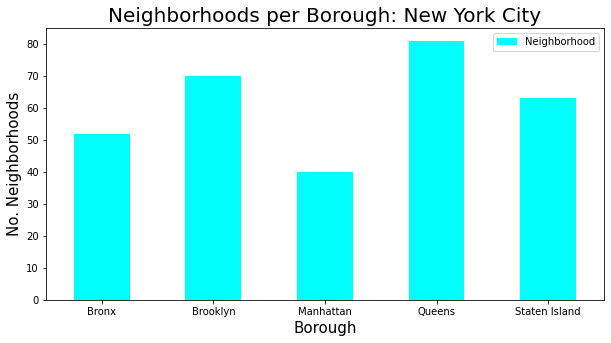

In [11]:
clr = "aqua"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
# title
plt.title('Neighborhoods per Borough: New York City', fontsize = 20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No. Neighborhoods',fontsize = 15)
#giving a bar plot
plt.xticks(rotation = 'horizontal')
#legend
plt.legend()
#displays the plot
plt.show()

- *The Borough of Manhattan has the least number of Neighborhoods in New York*

*Going a little deeper to find the number of African Restaurants in each Neighborhood and Borough, we therefore visualize the findings as well.*

In [12]:
# prepare neighborhood list that contains african restaurants
column_names=['Borough','Neighborhood', 'ID','Name']
african_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    african_restaurants=venues[venues['Category']=='African Restaurant']   
    print('(',count,'/',len(ny_data),')','African Restaurants in '+Neighborhood+', '+Borough+':'+str(len(african_restaurants)))
    print(row)
    for resturant_detail in african_restaurants.values.tolist():
        id, name , category=resturant_detail
        african_rest_ny = african_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) African Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) African Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) African Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) African Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) African Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) African Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) African Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) African Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) African Restaurants in Norwood, Bronx:0
['

In [13]:
african_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,University Heights,4c2f8b1b7cc0c9b6a1eaeb9a,Accra Resturant
1,Bronx,University Heights,4cb2beaadedbef3bca7c9d40,Papaye Restaurant
2,Bronx,Fordham,4cb2beaadedbef3bca7c9d40,Papaye Restaurant
3,Bronx,Belmont,4cb2beaadedbef3bca7c9d40,Papaye Restaurant
4,Brooklyn,Crown Heights,51d4d2cc454a777ed5a76c57,Cafe Rue Dix


In [14]:
african_rest_ny.shape

(14, 4)

In [15]:
african_rest_ny.tail()

,Borough,Neighborhood,ID,Name
9,Manhattan,East Harlem,5b855d2da0215b002c09d9fa,Teranga
10,Brooklyn,Wingate,4bae858bf964a5205dbc3be3,New Combination Restaurant
11,Brooklyn,Rugby,4bae858bf964a5205dbc3be3,New Combination Restaurant
12,Bronx,Mount Hope,4c2f8b1b7cc0c9b6a1eaeb9a,Accra Resturant
13,Brooklyn,Highland Park,4b1eefb3f964a520c72124e3,Festac Grill


In [16]:
african_rest_ny

,Borough,Neighborhood,ID,Name
0,Bronx,University Heights,4c2f8b1b7cc0c9b6a1eaeb9a,Accra Resturant
1,Bronx,University Heights,4cb2beaadedbef3bca7c9d40,Papaye Restaurant
2,Bronx,Fordham,4cb2beaadedbef3bca7c9d40,Papaye Restaurant
3,Bronx,Belmont,4cb2beaadedbef3bca7c9d40,Papaye Restaurant
4,Brooklyn,Crown Heights,51d4d2cc454a777ed5a76c57,Cafe Rue Dix
5,Manhattan,Hamilton Heights,53e01975498e78c0915599bf,Ponty Bistro Harlem
6,Manhattan,Central Harlem,53e01975498e78c0915599bf,Ponty Bistro Harlem
7,Manhattan,Central Harlem,4c2fdced452620a120551e0f,Keur Sokhna
8,Manhattan,Central Harlem,5004a9e5e4b034c2950659fd,Les Ambassades Senegalais Bistro
9,Manhattan,East Harlem,5b855d2da0215b002c09d9fa,Teranga


*Here we find out the number of African Restaurants in each Borough in New York City, we see that the Boroughs Bronx and Manhattan have the highest number of African restaurants in New York City each peeged at five African Restaurants.*

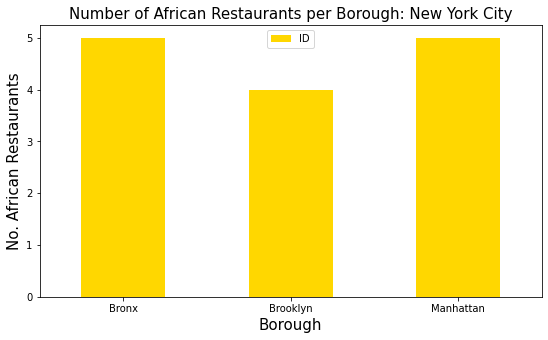

In [17]:
clr = "gold"
african_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(9,5), color=clr)
# title
plt.title('Number of African Restaurants per Borough: New York City', fontsize = 15)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No. African Restaurants',fontsize = 15)
#giving a bar plot
plt.xticks(rotation = 'horizontal')
#legend
plt.legend()
#displays the plot
plt.show()

*Here we find out the African Restaurants in each Neighborhood of New York.* 

- *The neighbouhood Central Harlem in the Borough of Manhattan has the highest number of African Restaurants(Three in number).*

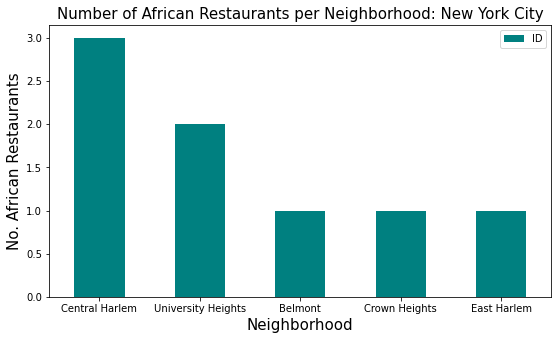

In [18]:
clr = "teal"
african_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot.bar(figsize=(9,5), color=clr)
# title
plt.title('Number of African Restaurants per Neighborhood: New York City', fontsize = 15)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No. African Restaurants',fontsize = 15)
#giving a bar plot
plt.xticks(rotation = 'horizontal')
#legend
plt.legend()
#displays the plot
plt.show()

In [19]:
african_rest_ny[african_rest_ny['Neighborhood']=='Central Harlem']

,Borough,Neighborhood,ID,Name
6,Manhattan,Central Harlem,53e01975498e78c0915599bf,Ponty Bistro Harlem
7,Manhattan,Central Harlem,4c2fdced452620a120551e0f,Keur Sokhna
8,Manhattan,Central Harlem,5004a9e5e4b034c2950659fd,Les Ambassades Senegalais Bistro


*At this point we find the ranking by way of mainly ratings,likes of the African Restaurants spoted*

In [20]:
# prepare neighborhood list that contains african restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
african_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in african_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these restaurants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(african_rest_ny),')','processed')
    african_rest_stats_ny = african_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID             Name  Likes  Rating  Tips
0  4c2f8b1b7cc0c9b6a1eaeb9a  Accra Resturant      9     7.2     3
( 1 / 14 ) processed
                         ID               Name  Likes  Rating  Tips
0  4cb2beaadedbef3bca7c9d40  Papaye Restaurant     11     7.8     3
( 2 / 14 ) processed
                         ID               Name  Likes  Rating  Tips
0  4cb2beaadedbef3bca7c9d40  Papaye Restaurant     11     7.8     3
( 3 / 14 ) processed
                         ID               Name  Likes  Rating  Tips
0  4cb2beaadedbef3bca7c9d40  Papaye Restaurant     11     7.8     3
( 4 / 14 ) processed
                         ID          Name  Likes  Rating  Tips
0  51d4d2cc454a777ed5a76c57  Cafe Rue Dix    207     8.5    59
( 5 / 14 ) processed
                         ID                 Name  Likes  Rating  Tips
0  53e01975498e78c0915599bf  Ponty Bistro Harlem    106     8.5    31
( 6 / 14 ) processed
                         ID                 Name  Likes  Rating  Tip

In [21]:
african_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,University Heights,4c2f8b1b7cc0c9b6a1eaeb9a,Accra Resturant,9,7.2,3
1,Bronx,University Heights,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
2,Bronx,Fordham,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
3,Bronx,Belmont,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
4,Brooklyn,Crown Heights,51d4d2cc454a777ed5a76c57,Cafe Rue Dix,207,8.5,59


In [22]:
african_rest_stats_ny

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,University Heights,4c2f8b1b7cc0c9b6a1eaeb9a,Accra Resturant,9,7.2,3
1,Bronx,University Heights,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
2,Bronx,Fordham,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
3,Bronx,Belmont,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
4,Brooklyn,Crown Heights,51d4d2cc454a777ed5a76c57,Cafe Rue Dix,207,8.5,59
5,Manhattan,Hamilton Heights,53e01975498e78c0915599bf,Ponty Bistro Harlem,106,8.5,31
6,Manhattan,Central Harlem,53e01975498e78c0915599bf,Ponty Bistro Harlem,106,8.5,31
7,Manhattan,Central Harlem,4c2fdced452620a120551e0f,Keur Sokhna,12,7.7,8
8,Manhattan,Central Harlem,5004a9e5e4b034c2950659fd,Les Ambassades Senegalais Bistro,26,7.6,11
9,Manhattan,East Harlem,5b855d2da0215b002c09d9fa,Teranga,19,8.8,7


In [23]:
african_rest_stats_ny.shape

(14, 7)

*Saving the African Restaurants data in a csv file.*

In [24]:
african_rest_stats_ny.to_csv('african_rest_stats_ny.csv', index=False)

In [25]:
african_rest_stats_ny_csv=pd.read_csv('african_rest_stats_ny.csv')

In [26]:
african_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,University Heights,4c2f8b1b7cc0c9b6a1eaeb9a,Accra Resturant,9,7.2,3
1,Bronx,University Heights,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
2,Bronx,Fordham,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
3,Bronx,Belmont,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
4,Brooklyn,Crown Heights,51d4d2cc454a777ed5a76c57,Cafe Rue Dix,207,8.5,59


In [27]:
african_rest_stats_ny_csv.shape

(14, 7)

In [28]:
african_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       14 non-null     object 
 1   Neighborhood  14 non-null     object 
 2   ID            14 non-null     object 
 3   Name          14 non-null     object 
 4   Likes         14 non-null     object 
 5   Rating        14 non-null     float64
 6   Tips          14 non-null     object 
dtypes: float64(1), object(6)
memory usage: 912.0+ bytes


*Coverting values such as Likes, Tips which are string values to float for computational purposes*

In [29]:
african_rest_stats_ny['Likes']=african_rest_stats_ny['Likes'].astype('float64')
african_rest_stats_ny['Tips']=african_rest_stats_ny['Tips'].astype('float64')
african_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       14 non-null     object 
 1   Neighborhood  14 non-null     object 
 2   ID            14 non-null     object 
 3   Name          14 non-null     object 
 4   Likes         14 non-null     float64
 5   Rating        14 non-null     float64
 6   Tips          14 non-null     float64
dtypes: float64(3), object(4)
memory usage: 912.0+ bytes


In [30]:
african_rest_stats_ny.describe()

,Likes,Rating,Tips
count,14.000000,14.000000,14.000000
mean,38.857143,7.557143,12.642857
std,59.486077,0.909534,16.578982
min,4.000000,6.100000,2.000000
25%,9.000000,7.200000,3.000000
50%,11.000000,7.750000,5.000000
75%,24.250000,8.325000,11.000000
max,207.000000,8.800000,59.000000


In [31]:
# The African Restaurant with the maximum Likes
african_rest_stats_ny.iloc[african_rest_stats_ny['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood               Crown Heights
ID              51d4d2cc454a777ed5a76c57
Name                        Cafe Rue Dix
Likes                                207
Rating                               8.5
Tips                                  59
Name: 4, dtype: object

In [32]:
# The African Restaurant with the maximum Rating
african_rest_stats_ny.iloc[african_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                 East Harlem
ID              5b855d2da0215b002c09d9fa
Name                             Teranga
Likes                                 19
Rating                               8.8
Tips                                   7
Name: 9, dtype: object

In [33]:
# The African Restaurant with the maximum Tips
african_rest_stats_ny.iloc[african_rest_stats_ny['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood               Crown Heights
ID              51d4d2cc454a777ed5a76c57
Name                        Cafe Rue Dix
Likes                                207
Rating                               8.5
Tips                                  59
Name: 4, dtype: object

*We get to know the neighborhoods with the maximum or highest average ratings for African Restaurants* (The top Neighborhoods with respect to ratings of African Restaurants)*

In [34]:
ny_neighborhood_stats=african_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
3,East Harlem,8.800000
2,Crown Heights,8.500000
5,Hamilton Heights,8.500000
1,Central Harlem,7.933333
0,Belmont,7.800000
4,Fordham,7.800000
9,University Heights,7.500000
7,Mount Hope,7.200000
6,Highland Park,6.200000
8,Rugby,6.100000


*We get to know the Boroughs with the maximum or highest average ratings for African Restaurants* *(The top Boroughs with respect to ratings of African Restaurants)*

In [35]:
ny_borough_stats=african_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.220
0,Bronx,7.560
1,Brooklyn,6.725


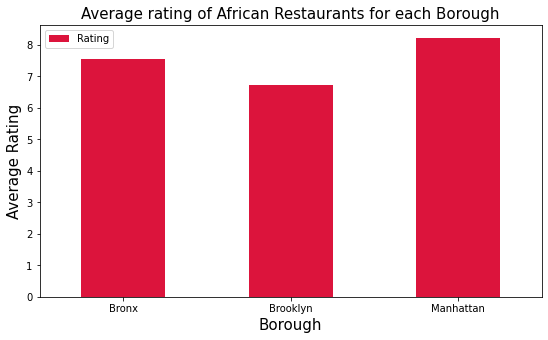

In [36]:
clr = "crimson"
african_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(9,5), color=clr)
# title
plt.title('Average rating of African Restaurants for each Borough', fontsize = 15)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating',fontsize = 15)
#giving a bar plot
plt.xticks(rotation = 'horizontal')
#legend
plt.legend()
#displays the plot
plt.show()

*At this point We will pictorially or visually map the neighborhoods with an average rating greater than or equal to 7.5 after merging the data with initial New York which consist of the geo points( latitudes and longitudes).*

In [37]:
ny_neighborhood_stats=african_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
3,East Harlem,8.800000
2,Crown Heights,8.500000
5,Hamilton Heights,8.500000
1,Central Harlem,7.933333
0,Belmont,7.800000
4,Fordham,7.800000
9,University Heights,7.500000
7,Mount Hope,7.200000
6,Highland Park,6.200000
8,Rugby,6.100000


In [38]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.5]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Belmont,7.800000
1,Central Harlem,7.933333
2,Crown Heights,8.500000
3,East Harlem,8.800000
4,Fordham,7.800000
5,Hamilton Heights,8.500000
9,University Heights,7.500000


In [39]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Bronx,Belmont,40.857277,-73.888452,7.800000
1,Manhattan,Central Harlem,40.815976,-73.943211,7.933333
2,Brooklyn,Crown Heights,40.670829,-73.943291,8.500000
3,Manhattan,East Harlem,40.792249,-73.944182,8.800000
4,Bronx,Fordham,40.860997,-73.896427,7.800000
5,Manhattan,Hamilton Heights,40.823604,-73.949688,8.500000
6,Bronx,University Heights,40.855727,-73.910416,7.500000


*Let's visualize by way of a map*

In [40]:
# create a map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big or small you want the circle markers to be
            color='gold',
            fill=True,
            fill_color='forestgreen',
            fill_opacity=0.6
        )
    )

In [41]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

- *Discussion Section:* 

*From the results of our general and exploratory analysis, I can categorically state that Manhattan is the best location or borough to find some wonderful African cuisine in New York City. Manhattan is the largest and most densely populated borough in the whole of New York City. Manhattan has the least number of neighborhoods in the whole of New York City. This may have accounted for its high rating in terms of the best place for African cuisine. Specifically, we can zero in on the neighborhood of East Harlem as the best neighborhood one can go for a lovely African cuisine. Teranga restaurant is the best restaurant one can go and enjoy a lovely African dish. According to the United States Census Bureau, the borough of Bronx has an appreciable population of Africans/black or African Americans. A big market or high demand for a business such as a restaurant is critical to the survival and growth. Of course, a restaurant situated at a place or location where an appreciable number of people long for foodies of such a restaurant is plus. Bronx again has multiple neighborhoods with high ratings exceeding 7.5(scale 1.0 – 10.0). The Bronx is home to a growing population of African immigrants, many of whom have arrived within the last ten years, between 2007 and 2014, the number of West African immigrants in the borough increased by more than 60 percent, according to census data collected by Queens College. Again, Bronx is also known for a great place for outdoor activities in New York City. The borough of Bronx is the cheapest borough to live in and The Bronx is 41.4% less expensive than Manhattan. The Bronx housing costs are 65.0% less expensive than Manhattan housing costs. This place is attractive to African immigrants as result of its large community of people of African descent. I would finally recommend a place in the Bronx specifically neighborhoods of Fordham, University Heights or Belmont as all of these places have very high ratings in terms of African restaurants in the Bronx. Again, another good recommendation would be in East Harlem of Manhattan or Crown Heights of Brooklyn. As Brooklyn has a considerable African resident in New York City and cheaper prices of properties compared to Manhattan.*
